In [87]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint,uniform
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from scipy.stats import loguniform
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [88]:
dataset = pd.read_csv('./datasets_11167_15520_train.csv')

In [89]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [90]:
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [91]:
dataset.describe()
# sc_w, px_height and pc need imputation with mean values

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [92]:
dataset['pc'].describe()

count    2000.000000
mean        9.916500
std         6.064315
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: pc, dtype: float64

In [93]:
# Data is small 2000 records. It's best to use SVM or RandomForest models
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [94]:
#No Need for imputation
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [95]:
#No Need for imputation
dataset.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [113]:
# Target is balanced. No balancing is needed.
dataset['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [97]:
dataset.loc[dataset['sc_w'] <= 0, 'sc_w'] = int(dataset['sc_w'].median())
dataset.loc[dataset['px_height'] <= 0, 'px_height'] = int(dataset['px_height'].median())
dataset.loc[dataset['pc'] <= 0, 'pc'] = int(dataset['pc'].median())
print("Invalid values have been replaced with the column mean.")

Invalid values have been replaced with the column mean.


In [98]:
# Spliting the data into training and test sets (80% train, 20% test)
X = dataset.drop('price_range', axis=1)  # All columns except price_range
y = dataset['price_range']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [99]:
rfc = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.random.randint(2, 15, size=10),
    'min_samples_leaf': np.random.randint(1, 10, size=6),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, scoring='f1_weighted', cv=skf, random_state=42)

random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)

r_best_model = random_search.best_estimator_

Best Parameters: {'n_estimators': 500, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [100]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': list(np.random.randint(2, 15, size=10)),
    'min_samples_leaf': list(np.random.randint(1, 10, size=6)),
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=skf, scoring='f1_weighted')


# Fiting RandomizedSearchCV
grid_search.fit(X_train, y_train)

# Printing best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Evaluating on test set
d_best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best Accuracy: 0.8665063473364109


# Prediction with RandomForestClassifier

In [101]:
y_pred = r_best_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.88      0.84      0.86        91
           2       0.81      0.85      0.83        92
           3       0.93      0.90      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



# Prediction With Decision Tree

In [102]:
y_pred = d_best_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       105
           1       0.73      0.88      0.80        91
           2       0.77      0.78      0.78        92
           3       0.94      0.86      0.90       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



# SVM Model

## Exploratory Data Analysis

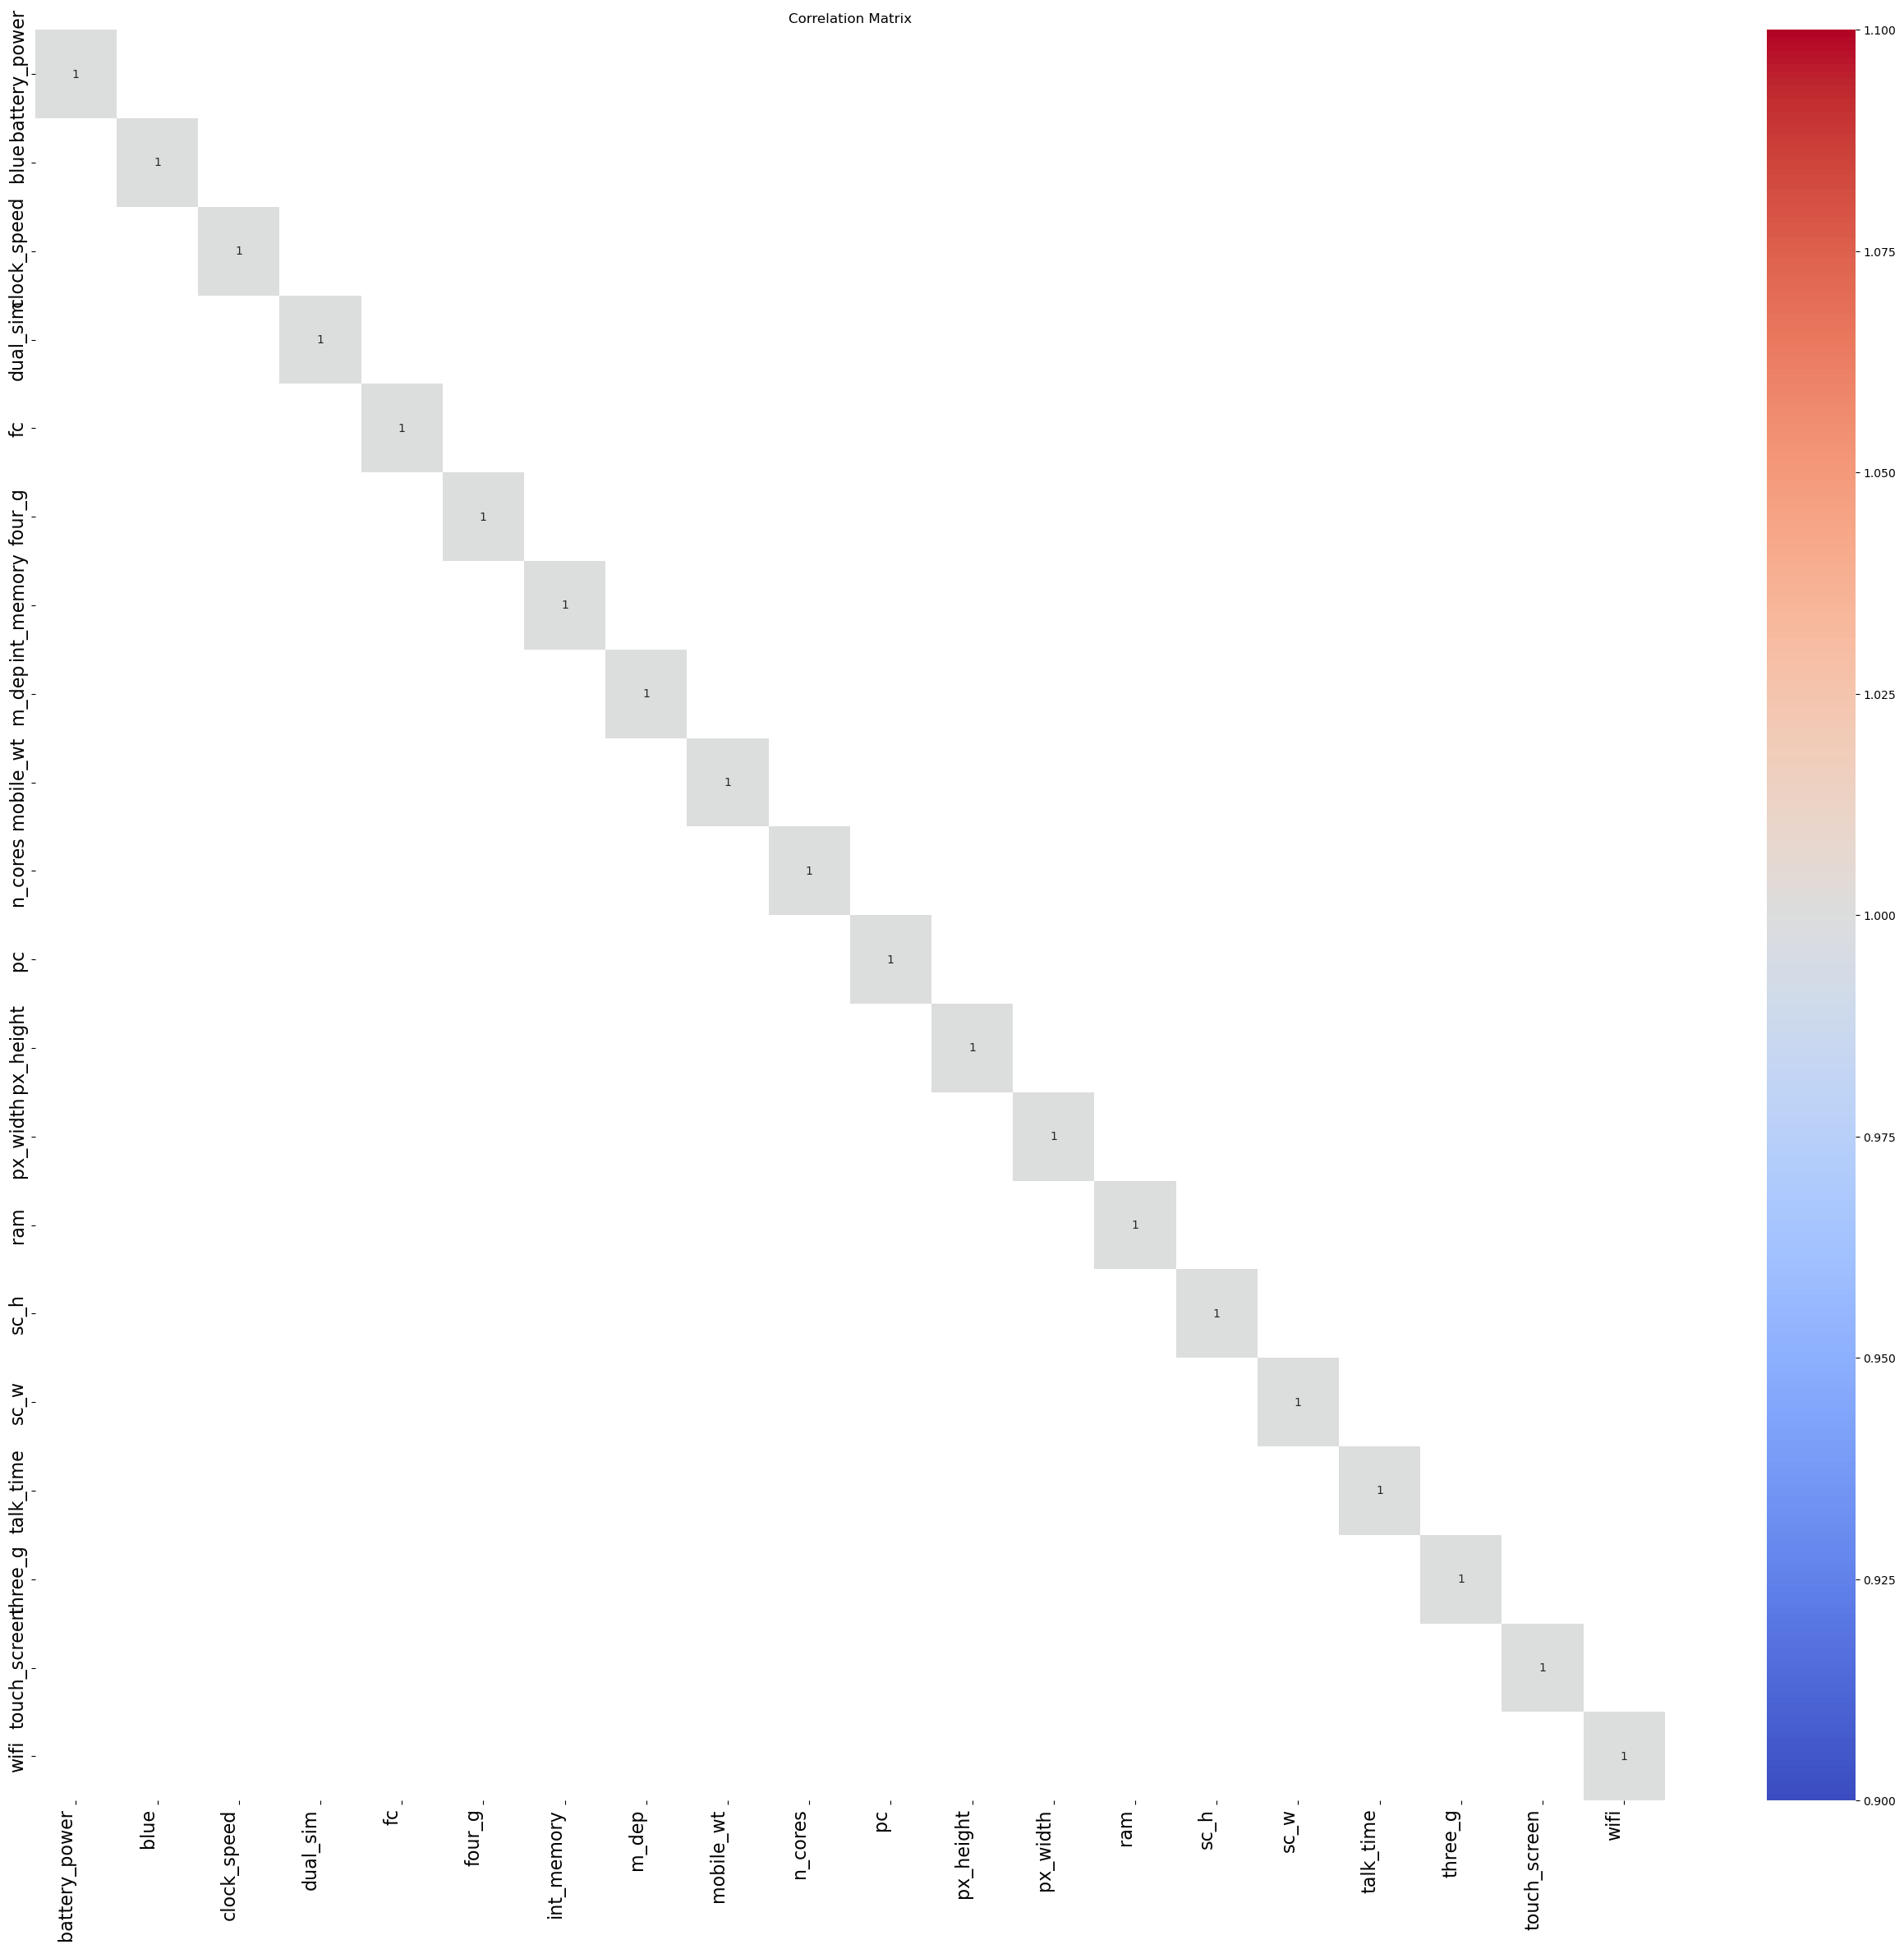

In [103]:
feats = dataset.drop('price_range', axis=1)
corr_matrix = feats.corr()
fcorr_matrix = corr_matrix[(corr_matrix >= .80) | (corr_matrix <= -.80)]
plt.figure(figsize=(32,28))
sns.heatmap(fcorr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, ha='right', fontsize=16)  # Rotate and increase x-axis labels
plt.yticks(fontsize=16)  # Increase y-axis labels
plt.title("Correlation Matrix")
plt.show()

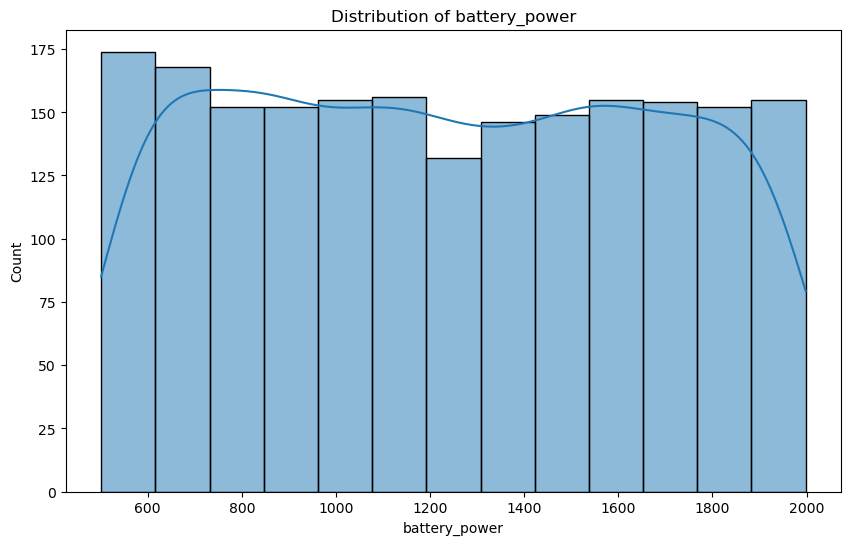

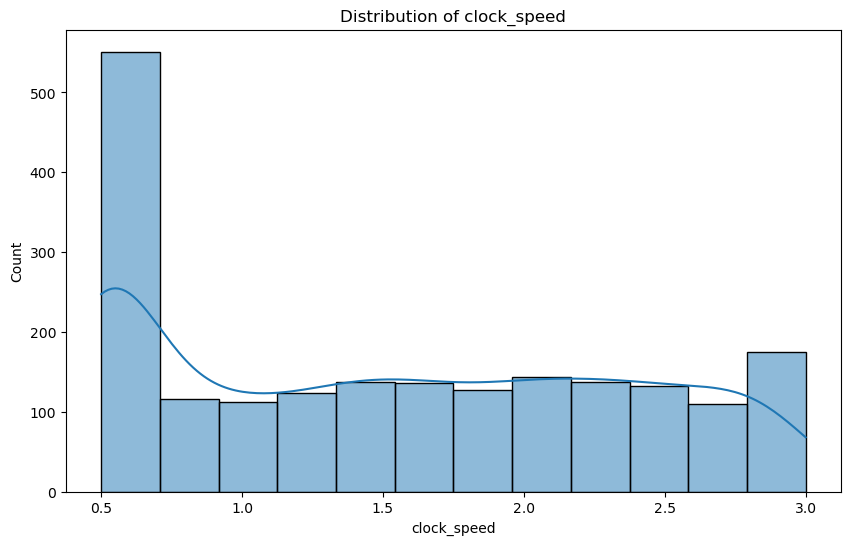

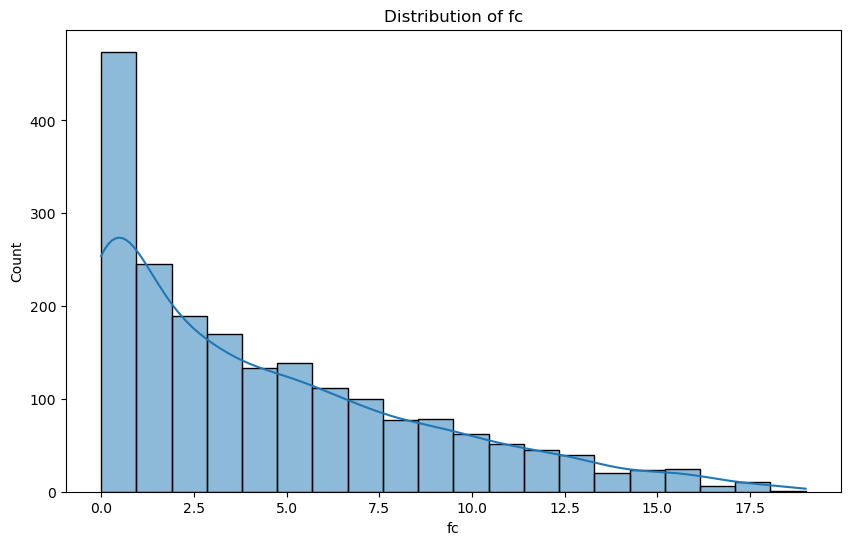

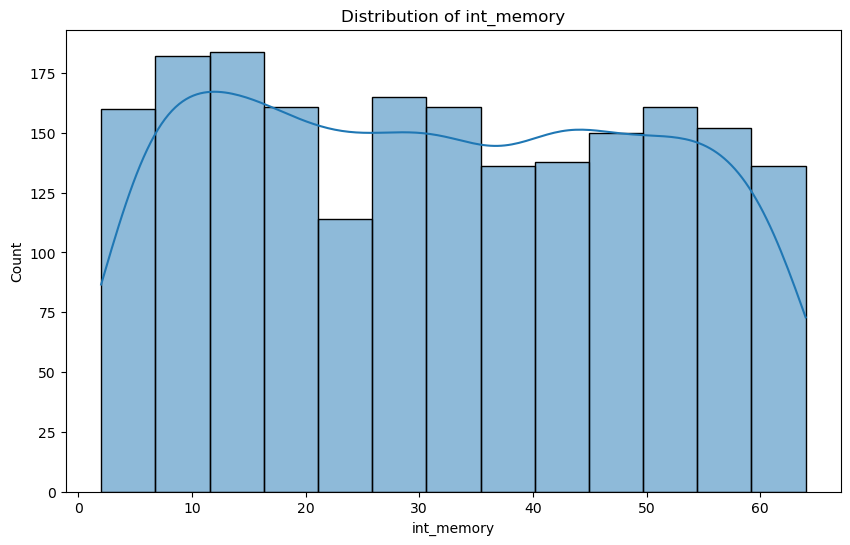

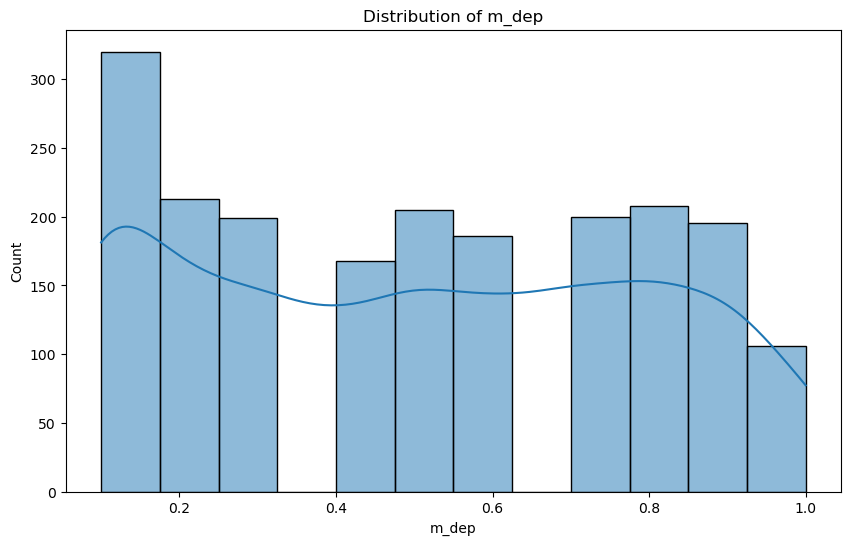

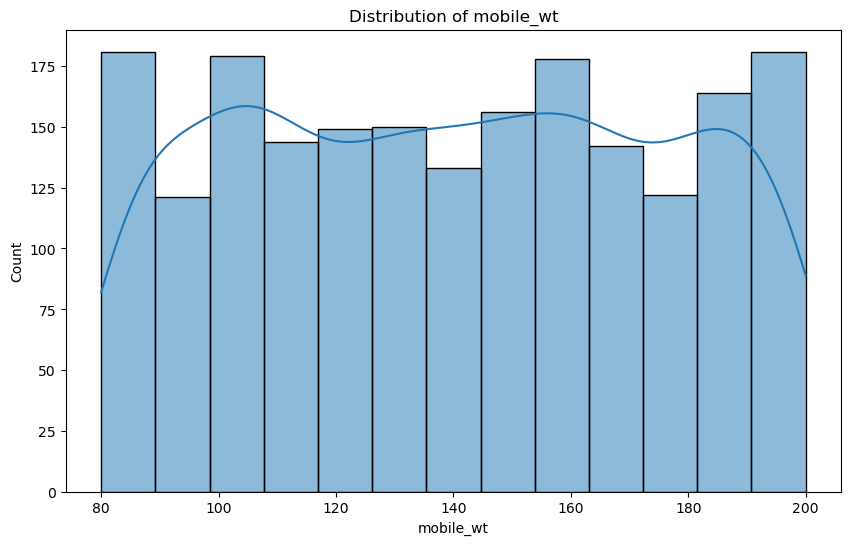

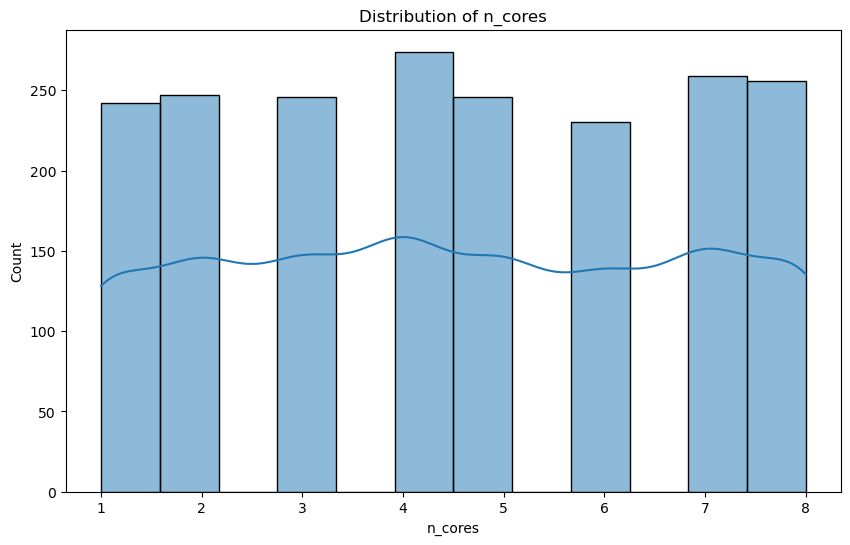

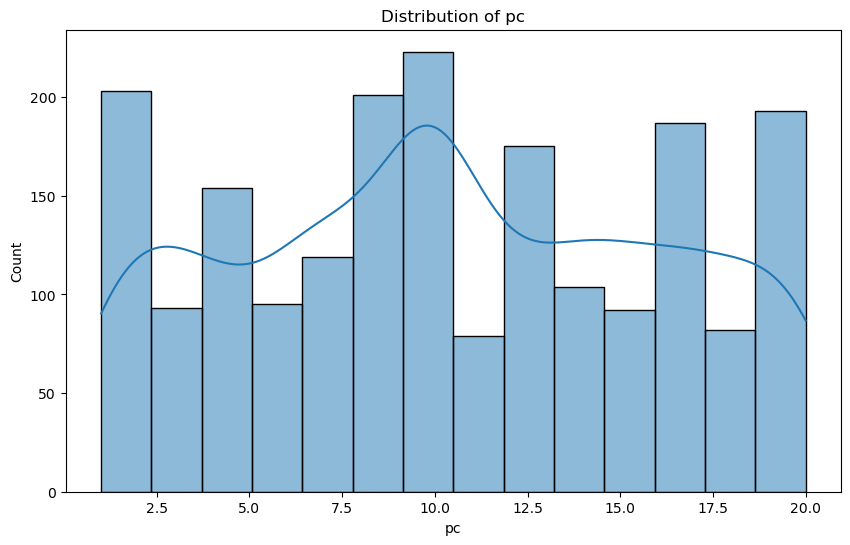

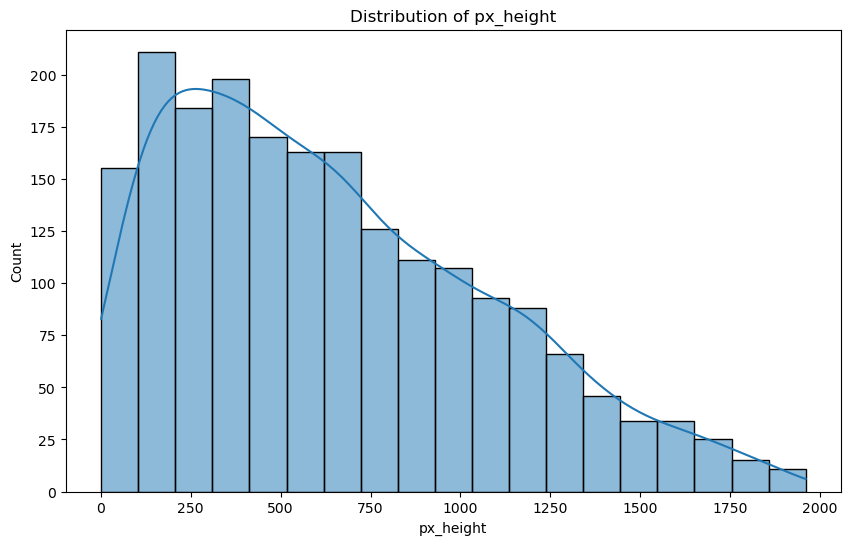

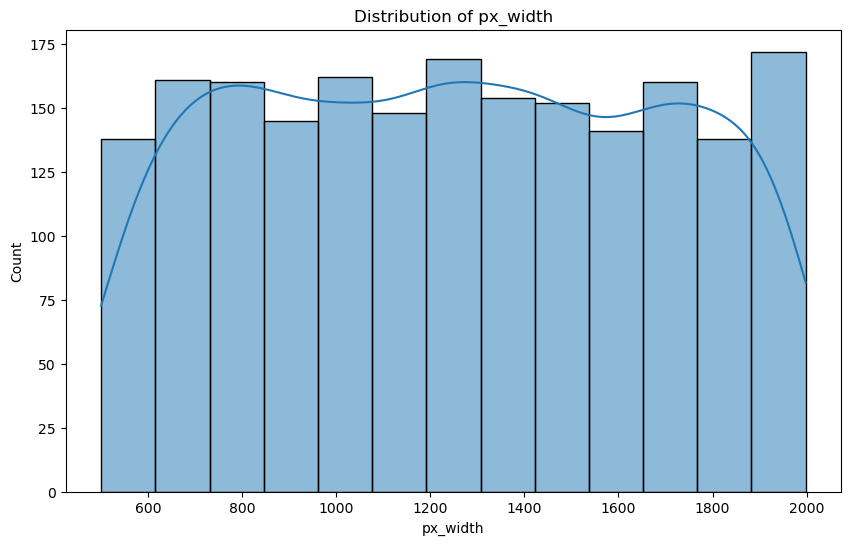

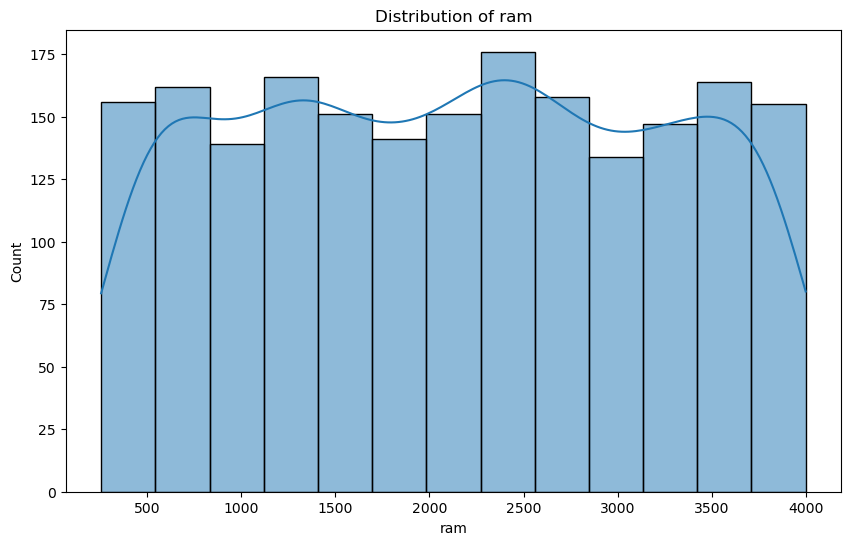

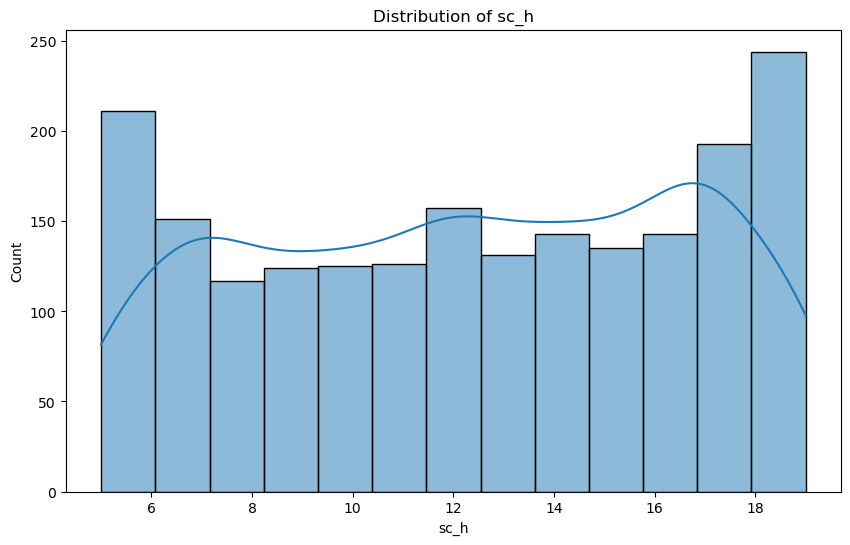

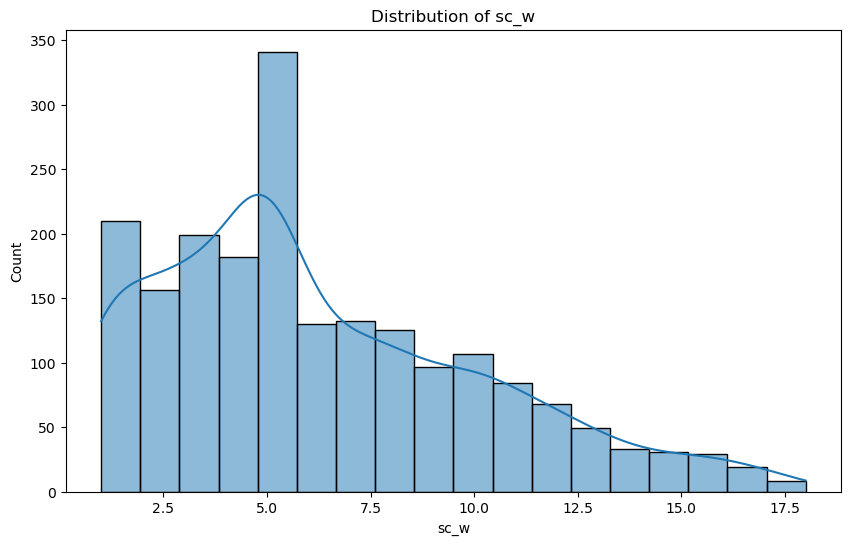

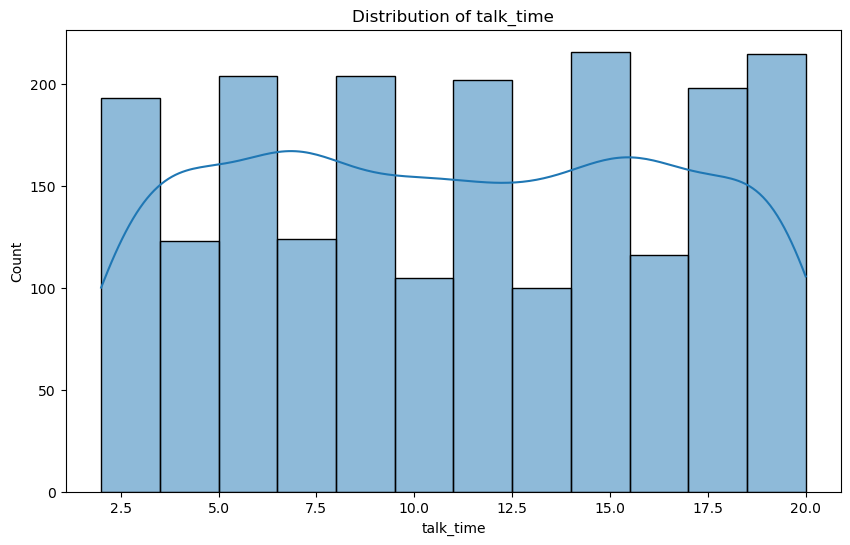

In [104]:
cat_features = ["wifi", "touch_screen", "three_g", "four_g", "dual_sim", "blue", "price_range"]
numeric_features = dataset.drop(cat_features, axis=1)
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_features[feature], kde=True)  # Add KDE for smoother distribution
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## Preprocessing

### Normalizaion with RobustScaler

In [105]:
features = dataset.drop("price_range", axis=1)
#Normalization using RobustScalar:
scaler = RobustScaler()
dataset[features.columns] = scaler.fit_transform(features)


In [106]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.502947,0.0,0.466667,-1.0,-0.333333,-1.0,-0.78125,0.166667,0.770492,-0.50,...,-0.820204,-0.647544,0.216747,-0.428571,0.333333,0.8,-1.0,-1.0,0.0,1
1,-0.268500,1.0,-0.666667,0.0,-0.500000,0.0,0.65625,0.333333,-0.081967,-0.25,...,0.514135,0.977250,0.260905,0.714286,-0.333333,-0.4,0.0,0.0,-1.0,2
2,-0.868369,1.0,-0.666667,0.0,-0.166667,0.0,0.28125,0.666667,0.065574,0.25,...,1.053901,0.618530,0.245827,-0.142857,-0.500000,-0.2,0.0,0.0,-1.0,2
3,-0.800262,1.0,0.666667,-1.0,-0.500000,-1.0,-0.68750,0.500000,-0.163934,0.50,...,0.983038,0.710847,0.335218,0.571429,0.500000,0.0,0.0,-1.0,-1.0,2
4,0.779306,1.0,-0.200000,-1.0,1.666667,0.0,0.37500,0.166667,0.000000,-0.50,...,0.970976,-0.046159,-0.396069,-0.571429,-0.500000,0.4,0.0,0.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.565815,1.0,-0.666667,0.0,-0.500000,0.0,-0.93750,0.500000,-0.573770,0.50,...,0.992084,0.848005,-0.796177,0.142857,-0.166667,0.8,0.0,0.0,-1.0,0
1996,0.967911,1.0,0.733333,0.0,-0.500000,-1.0,0.21875,-0.500000,0.754098,0.00,...,0.529212,0.946917,-0.061659,-0.142857,0.833333,0.5,0.0,0.0,0.0,2
1997,0.897184,0.0,-0.400000,0.0,-0.333333,0.0,0.12500,0.333333,-0.540984,1.00,...,0.458349,0.507748,0.490307,-0.428571,-0.666667,-0.6,0.0,0.0,-1.0,3
1998,0.374591,0.0,-0.400000,-1.0,0.166667,0.0,0.43750,-0.666667,0.065574,0.25,...,-0.343762,-0.760963,-0.687938,0.857143,0.833333,0.8,0.0,0.0,0.0,0


## Training

In [107]:
X = dataset.drop('price_range', axis=1)  # All columns except price_range
y = dataset['price_range']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_distributions = {
    'C': [0.001, 0.1, 1, 10, 100],
    'gamma':  loguniform(1e-4, 1),
    'kernel': ['rbf', 'sigmoid', 'linear', 'poly']
}
random_search = RandomizedSearchCV(estimator=SVC(), param_distributions=param_distributions, n_iter=50, cv=skf, scoring='f1_weighted', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
svc_model = random_search.best_estimator_

Best Parameters: {'C': 100, 'gamma': 0.7706343825607371, 'kernel': 'linear'}


## Predict

In [108]:
y_pred = svc_model.predict(X_test)

print("SVC Classification Report:\n", classification_report(y_test, y_pred))

SVC Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.95      1.00      0.97        91
           2       0.99      0.98      0.98        92
           3       0.98      0.99      0.99       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



# Logistic Regression

In [112]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.502947,0.0,0.466667,-1.0,-0.333333,-1.0,-0.78125,0.166667,0.770492,-0.50,...,-0.820204,-0.647544,0.216747,-0.428571,0.333333,0.8,-1.0,-1.0,0.0,1
1,-0.268500,1.0,-0.666667,0.0,-0.500000,0.0,0.65625,0.333333,-0.081967,-0.25,...,0.514135,0.977250,0.260905,0.714286,-0.333333,-0.4,0.0,0.0,-1.0,2
2,-0.868369,1.0,-0.666667,0.0,-0.166667,0.0,0.28125,0.666667,0.065574,0.25,...,1.053901,0.618530,0.245827,-0.142857,-0.500000,-0.2,0.0,0.0,-1.0,2
3,-0.800262,1.0,0.666667,-1.0,-0.500000,-1.0,-0.68750,0.500000,-0.163934,0.50,...,0.983038,0.710847,0.335218,0.571429,0.500000,0.0,0.0,-1.0,-1.0,2
4,0.779306,1.0,-0.200000,-1.0,1.666667,0.0,0.37500,0.166667,0.000000,-0.50,...,0.970976,-0.046159,-0.396069,-0.571429,-0.500000,0.4,0.0,0.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.565815,1.0,-0.666667,0.0,-0.500000,0.0,-0.93750,0.500000,-0.573770,0.50,...,0.992084,0.848005,-0.796177,0.142857,-0.166667,0.8,0.0,0.0,-1.0,0
1996,0.967911,1.0,0.733333,0.0,-0.500000,-1.0,0.21875,-0.500000,0.754098,0.00,...,0.529212,0.946917,-0.061659,-0.142857,0.833333,0.5,0.0,0.0,0.0,2
1997,0.897184,0.0,-0.400000,0.0,-0.333333,0.0,0.12500,0.333333,-0.540984,1.00,...,0.458349,0.507748,0.490307,-0.428571,-0.666667,-0.6,0.0,0.0,-1.0,3
1998,0.374591,0.0,-0.400000,-1.0,0.166667,0.0,0.43750,-0.666667,0.065574,0.25,...,-0.343762,-0.760963,-0.687938,0.857143,0.833333,0.8,0.0,0.0,0.0,0


## Training

In [117]:
X = dataset.drop('price_range', axis=1)  # All columns except price_range
y = dataset['price_range']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # Set 'l2' as penalty for solvers that don't support 'l1'
    'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],  # Solvers that only support 'l2'
    'max_iter': [200, 300, 1000]
}

logreg = LogisticRegression()
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=skf, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [200, 300, 1000],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag']},
             scoring='f1_weighted')

## Predict

In [118]:
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.9643241931278421
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



# Feature Importance Using Most Relevant SVM Model

In [ ]:
perm_importance = permutation_importance(svc_model, X_test, y_test, scoring="accuracy", random_state=42)

# Display the results
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feature_importance)